## Low Hanging Fruit- Descriptive Statistics

### Across the Database and Partitioned By Genre and Decade

This notebook compiles some basic descriptive statistics to use as a backdrop for the sentiment analysis: 
- word counts as a proxy for song length
- word repetition as the inverse of lexical diversity

It starts with the standard library loads.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


Load additional:

In [2]:
import itertools
import collections
import json
import pickle
import nltk

#this only necessary first time through, hence commented out
#nltk.download()

Stored Data:

In [3]:
# Open everything that's been saved in /data/conditioned
df=pd.read_csv("../../data/conditioned/master_lyrics_with_all_years_genres.csv")

#clean out some junk
del df['Unnamed: 0']
del df['NA']
del df['/w/index.php?title=Country_Rap&action=edit&redlink=1']
df.head(2)

,song_key,lyrics,lyrics_url,lyrics_abstract,decade,artist,title,year,band_singer,ranking,song,songurl,url,born,genres,ya,/wiki/2_Tone,/wiki/A_cappella,/wiki/Acid_house,/wiki/Acid_jazz,/wiki/Acid_rock,/wiki/Acoustic_music,/wiki/Acoustic_rock,/wiki/Adult_Contemporary,/wiki/Adult_Contemporary_Music,/wiki/Adult_contemporary,/wiki/Adult_contemporary_music,/wiki/Adult_contemporary_music#Soft_adult_contemporary,/wiki/Afrobeat,/wiki/Album-oriented_rock,/wiki/Alternative_R%26B,/wiki/Alternative_country,/wiki/Alternative_dance,/wiki/Alternative_dance#Indietronica,/wiki/Alternative_hip_hop,/wiki/Alternative_metal,/wiki/Alternative_pop,/wiki/Alternative_rock,/wiki/Ambient_house,/wiki/Ambient_music,/wiki/American_folk_music,/wiki/Americana_(music),/wiki/Anarcho-punk,/wiki/Anti-folk,/wiki/Arena_rock,/wiki/Art_pop,/wiki/Art_punk,/wiki/Art_rock,/wiki/Avant-garde_music,/wiki/Baggy,...,/wiki/Soul_jazz,/wiki/Soul_music,/wiki/Southern_Rock,/wiki/Southern_gospel,/wiki/Southern_hip_hop,/wiki/Southern_rap,/wiki/Southern_rock,/wiki/Southern_soul,/wiki/Space_disco,/wiki/Space_rock,/wiki/Spoken_word,/wiki/Sunshine_pop,/wiki/Surf_music,/wiki/Surf_rock,/wiki/Swamp_pop,/wiki/Swamp_rock,/wiki/Swing_(genre),/wiki/Swing_music,/wiki/Symphonic_rock,/wiki/Synthpop,/wiki/Talking_blues,/wiki/Tech_house,/wiki/Techno,/wiki/Techno_music,/wiki/Teen_pop,/wiki/Tejano_music,/wiki/Thrash_metal,/wiki/Traditional_pop,/wiki/Traditional_pop_music,/wiki/Trance_music,/wiki/Trap_music,/wiki/Trip_hop,/wiki/UK_funky,/wiki/UK_garage,/wiki/Underground_hip_hop,/wiki/Urban_adult_contemporary,/wiki/Urban_contemporary,/wiki/Urban_contemporary_gospel,/wiki/Urban_music,/wiki/Vocal_music,/wiki/West_Coast_Rap,/wiki/West_Coast_hip_hop,/wiki/West_coast_hip_hop,/wiki/Western_music_(North_America),/wiki/Western_swing,/wiki/Witch_house,/wiki/World_music,/wiki/Worldbeat,/wiki/Worship_music,/wiki/Zydeco
0,1970-1,When you're weary. Feeling small. When tears a...,http://lyrics.wikia.com/Simon_And_Garfunkel:Br...,When you're weary. Feeling small. When tears a...,1970,Simon and Garfunkel,Bridge over Troubled Water,1970,Simon & Garfunkel,1,Bridge over Troubled Water,/wiki/Bridge_over_Troubled_Water_(song),/wiki/Simon_%26_Garfunkel,False,[/wiki/Folk_rock],"1957–1970 (Reunions: 1975, 1981–83, 1990, 1993...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1970-2,Why do birds suddenly appear. Everytime you ar...,http://lyrics.wikia.com/Carpenters:%28They_Lon...,Why do birds suddenly appear. Everytime you ar...,1970,The Carpenters,(They Long to Be) Close to You,1970,The Carpenters,2,(They Long to Be) Close to You,/wiki/(They_Long_to_Be)_Close_to_You,/wiki/The_Carpenters,False,"[/wiki/Pop_music, /wiki/Soft_rock, /wiki/Adult...",1969–1983,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Lexical Diversity Exploration

Lexical diversity is the ratio of unique words (i.e. vocabulary) to total words in a given body of work.

Stored in JSON objects suitable for visualizations

### Measure the df and the deades and the genres 


In [4]:
## Lexical Diversity Exploration
decades=df.decade.unique()
df.shape, len(decades)

((5072, 449), 5)

## Repetition of Words Within Songs

Repetition of words or phrases is a frequently used design element in music lyrics. Comparison of text analysis of lyrics to text analysis of prose could therefore be uninformative or even misleading. While this subject alone could merit extensive study, at the point we make some effort to quantify the degree of repetition contained in each song by calculating its lexical diversity using NLTK, as described in Bird,Klein, and Loper [Natural Language Processing with Python](http://www.nltk.org/book/). A column for lexical diversity is added to each row of the dataframe.  

In [5]:
#df[df.title=='Tubular Bells']['lyrics']="Instrumental"
df.iloc[478,6]="Instrumental"
df.iloc[478,6]

'Instrumental'

In [6]:
## should not be needed since bad data has been removed from the df.................

# change "We don't currently have a license" to "instrumental" so it's deleted when 
# all containing "instrumental" are
counter=0
#eliminate rows with null lyrics
dfc = df[pd.isnull(df.lyrics)==False]


for row in dfc.iterrows():
    if row[1][6].startswith("We don't currently have a license"):
        dfc.iloc[row[1][1],6]="Instrumental"
    counter+=1
    if counter >3000:
        break


#eliminate instrumentals
dfc = dfc[df.lyrics!="Instrumental"]


dfc.shape
dfc.head(2)

C:\Users\sss\Anaconda\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,song_key,lyrics,lyrics_url,lyrics_abstract,decade,artist,title,year,band_singer,ranking,song,songurl,url,born,genres,ya,/wiki/2_Tone,/wiki/A_cappella,/wiki/Acid_house,/wiki/Acid_jazz,/wiki/Acid_rock,/wiki/Acoustic_music,/wiki/Acoustic_rock,/wiki/Adult_Contemporary,/wiki/Adult_Contemporary_Music,/wiki/Adult_contemporary,/wiki/Adult_contemporary_music,/wiki/Adult_contemporary_music#Soft_adult_contemporary,/wiki/Afrobeat,/wiki/Album-oriented_rock,/wiki/Alternative_R%26B,/wiki/Alternative_country,/wiki/Alternative_dance,/wiki/Alternative_dance#Indietronica,/wiki/Alternative_hip_hop,/wiki/Alternative_metal,/wiki/Alternative_pop,/wiki/Alternative_rock,/wiki/Ambient_house,/wiki/Ambient_music,/wiki/American_folk_music,/wiki/Americana_(music),/wiki/Anarcho-punk,/wiki/Anti-folk,/wiki/Arena_rock,/wiki/Art_pop,/wiki/Art_punk,/wiki/Art_rock,/wiki/Avant-garde_music,/wiki/Baggy,...,/wiki/Soul_jazz,/wiki/Soul_music,/wiki/Southern_Rock,/wiki/Southern_gospel,/wiki/Southern_hip_hop,/wiki/Southern_rap,/wiki/Southern_rock,/wiki/Southern_soul,/wiki/Space_disco,/wiki/Space_rock,/wiki/Spoken_word,/wiki/Sunshine_pop,/wiki/Surf_music,/wiki/Surf_rock,/wiki/Swamp_pop,/wiki/Swamp_rock,/wiki/Swing_(genre),/wiki/Swing_music,/wiki/Symphonic_rock,/wiki/Synthpop,/wiki/Talking_blues,/wiki/Tech_house,/wiki/Techno,/wiki/Techno_music,/wiki/Teen_pop,/wiki/Tejano_music,/wiki/Thrash_metal,/wiki/Traditional_pop,/wiki/Traditional_pop_music,/wiki/Trance_music,/wiki/Trap_music,/wiki/Trip_hop,/wiki/UK_funky,/wiki/UK_garage,/wiki/Underground_hip_hop,/wiki/Urban_adult_contemporary,/wiki/Urban_contemporary,/wiki/Urban_contemporary_gospel,/wiki/Urban_music,/wiki/Vocal_music,/wiki/West_Coast_Rap,/wiki/West_Coast_hip_hop,/wiki/West_coast_hip_hop,/wiki/Western_music_(North_America),/wiki/Western_swing,/wiki/Witch_house,/wiki/World_music,/wiki/Worldbeat,/wiki/Worship_music,/wiki/Zydeco
0,1970-1,When you're weary. Feeling small. When tears a...,http://lyrics.wikia.com/Simon_And_Garfunkel:Br...,When you're weary. Feeling small. When tears a...,1970,Simon and Garfunkel,Bridge over Troubled Water,1970,Simon & Garfunkel,1,Bridge over Troubled Water,/wiki/Bridge_over_Troubled_Water_(song),/wiki/Simon_%26_Garfunkel,False,[/wiki/Folk_rock],"1957–1970 (Reunions: 1975, 1981–83, 1990, 1993...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1970-2,Why do birds suddenly appear. Everytime you ar...,http://lyrics.wikia.com/Carpenters:%28They_Lon...,Why do birds suddenly appear. Everytime you ar...,1970,The Carpenters,(They Long to Be) Close to You,1970,The Carpenters,2,(They Long to Be) Close to You,/wiki/(They_Long_to_Be)_Close_to_You,/wiki/The_Carpenters,False,"[/wiki/Pop_music, /wiki/Soft_rock, /wiki/Adult...",1969–1983,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# make an array containing lexical diversity of each song
wordset=[]
wordcount=[]
lexdivs=[]
repscore=[]
counter=0
for row in dfc.iterrows():
    k=row[1][1]
    d=len(nltk.word_tokenize(k))
    n=len(set(nltk.word_tokenize(k)))
    wordset.append(1.0*n)
    wordcount.append(1.0*d)    

In [8]:
dfc['wordcount']=wordcount
dfc['wordset']=wordset
lexdivs= np.array(wordset)/np.array(wordcount)
dfc['lexdiv']=lexdivs
dfc['repetition_score']= 1/lexdivs
print len(lexdivs), len(dfc)
dfc.head(2)


4893 4893


,song_key,lyrics,lyrics_url,lyrics_abstract,decade,artist,title,year,band_singer,ranking,song,songurl,url,born,genres,ya,/wiki/2_Tone,/wiki/A_cappella,/wiki/Acid_house,/wiki/Acid_jazz,/wiki/Acid_rock,/wiki/Acoustic_music,/wiki/Acoustic_rock,/wiki/Adult_Contemporary,/wiki/Adult_Contemporary_Music,/wiki/Adult_contemporary,/wiki/Adult_contemporary_music,/wiki/Adult_contemporary_music#Soft_adult_contemporary,/wiki/Afrobeat,/wiki/Album-oriented_rock,/wiki/Alternative_R%26B,/wiki/Alternative_country,/wiki/Alternative_dance,/wiki/Alternative_dance#Indietronica,/wiki/Alternative_hip_hop,/wiki/Alternative_metal,/wiki/Alternative_pop,/wiki/Alternative_rock,/wiki/Ambient_house,/wiki/Ambient_music,/wiki/American_folk_music,/wiki/Americana_(music),/wiki/Anarcho-punk,/wiki/Anti-folk,/wiki/Arena_rock,/wiki/Art_pop,/wiki/Art_punk,/wiki/Art_rock,/wiki/Avant-garde_music,/wiki/Baggy,...,/wiki/Southern_hip_hop,/wiki/Southern_rap,/wiki/Southern_rock,/wiki/Southern_soul,/wiki/Space_disco,/wiki/Space_rock,/wiki/Spoken_word,/wiki/Sunshine_pop,/wiki/Surf_music,/wiki/Surf_rock,/wiki/Swamp_pop,/wiki/Swamp_rock,/wiki/Swing_(genre),/wiki/Swing_music,/wiki/Symphonic_rock,/wiki/Synthpop,/wiki/Talking_blues,/wiki/Tech_house,/wiki/Techno,/wiki/Techno_music,/wiki/Teen_pop,/wiki/Tejano_music,/wiki/Thrash_metal,/wiki/Traditional_pop,/wiki/Traditional_pop_music,/wiki/Trance_music,/wiki/Trap_music,/wiki/Trip_hop,/wiki/UK_funky,/wiki/UK_garage,/wiki/Underground_hip_hop,/wiki/Urban_adult_contemporary,/wiki/Urban_contemporary,/wiki/Urban_contemporary_gospel,/wiki/Urban_music,/wiki/Vocal_music,/wiki/West_Coast_Rap,/wiki/West_Coast_hip_hop,/wiki/West_coast_hip_hop,/wiki/Western_music_(North_America),/wiki/Western_swing,/wiki/Witch_house,/wiki/World_music,/wiki/Worldbeat,/wiki/Worship_music,/wiki/Zydeco,wordcount,wordset,lexdiv,repetition_score
0,1970-1,When you're weary. Feeling small. When tears a...,http://lyrics.wikia.com/Simon_And_Garfunkel:Br...,When you're weary. Feeling small. When tears a...,1970,Simon and Garfunkel,Bridge over Troubled Water,1970,Simon & Garfunkel,1,Bridge over Troubled Water,/wiki/Bridge_over_Troubled_Water_(song),/wiki/Simon_%26_Garfunkel,False,[/wiki/Folk_rock],"1957–1970 (Reunions: 1975, 1981–83, 1990, 1993...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,201,82,0.407960,2.451220
1,1970-2,Why do birds suddenly appear. Everytime you ar...,http://lyrics.wikia.com/Carpenters:%28They_Lon...,Why do birds suddenly appear. Everytime you ar...,1970,The Carpenters,(They Long to Be) Close to You,1970,The Carpenters,2,(They Long to Be) Close to You,/wiki/(They_Long_to_Be)_Close_to_You,/wiki/The_Carpenters,False,"[/wiki/Pop_music, /wiki/Soft_rock, /wiki/Adult...",1969–1983,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,252,65,0.257937,3.876923


In [9]:
def lexplot(stat,title,ylab):
    years=dfc.groupby('decade')
    yearlexdiv= dict()
    outdict={}
    for year in years:
        yearlexdiv[year[0]]= year[1][stat].mean()
        outdict[str(year[0])]= year[1][stat].mean()
    plotdict = collections.OrderedDict(sorted(yearlexdiv.items())) 
    #plt.ylim([0,1])
    plt.title(title)
    plt.ylabel(ylab)
    plt.xlabel("Year (Decade)")
    x=plotdict.keys()
    y=plotdict.values()
    with open(stat+"_by_decade.json","w") as fd:
        json.dump(outdict, fd)
    #print yearlexdiv
    plt.plot(x,y)

    years=dfc.groupby('year')
    yearlexdiv= dict()
    for year in years:
        yearlexdiv[year[0]]= year[1][stat].mean()
        outdict[str(year[0])]= year[1][stat].mean()
    plotdict = collections.OrderedDict(sorted(yearlexdiv.items())) 
    x=plotdict.keys()
    y=plotdict.values()
    with open(stat+"_by_year.json","w") as fd:
        json.dump(outdict, fd)
    plt.plot(x,y)


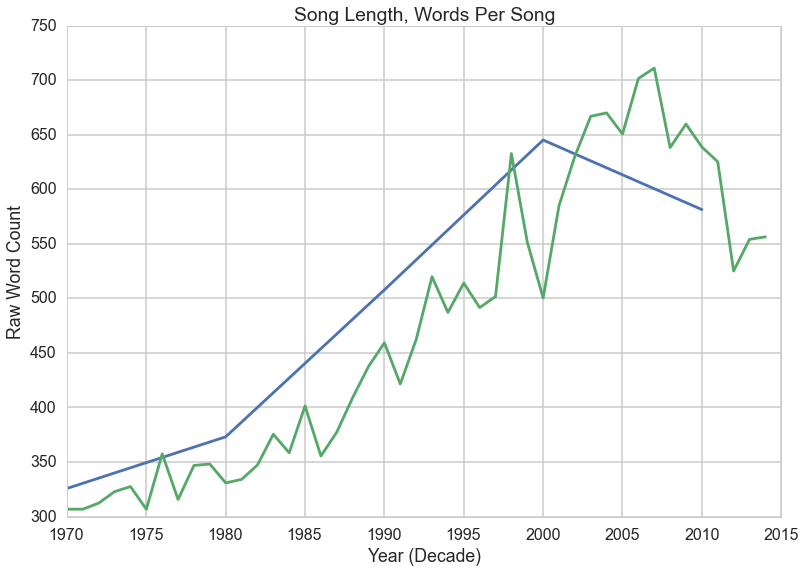

In [10]:
lexplot('wordcount',"Song Length, Words Per Song","Raw Word Count")

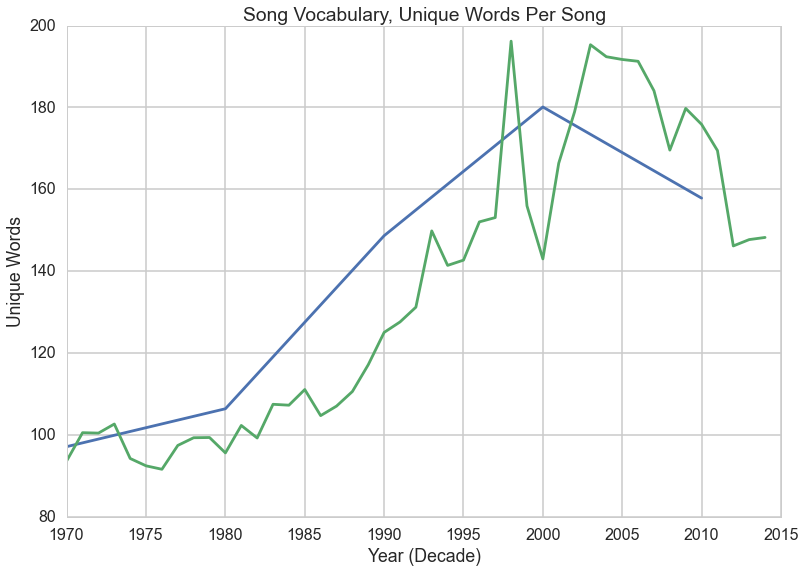

In [11]:
lexplot("wordset","Song Vocabulary, Unique Words Per Song","Unique Words")

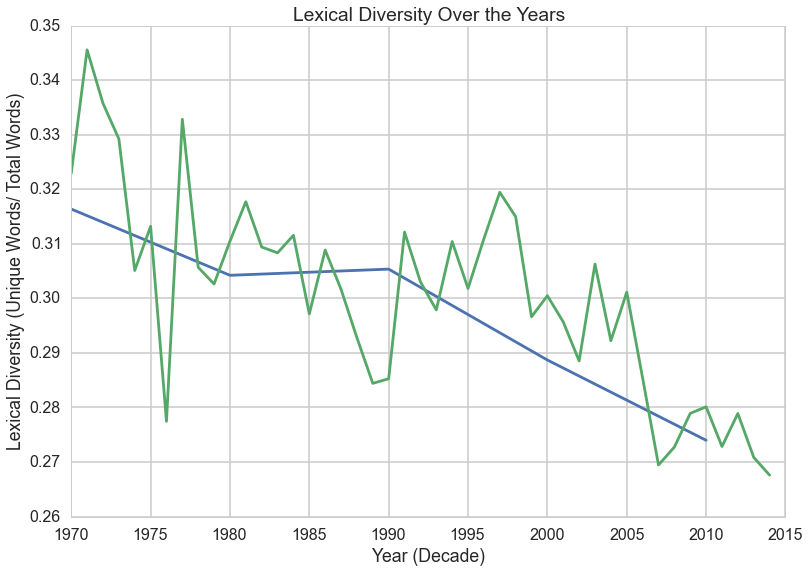

In [12]:
lexplot('lexdiv',"Lexical Diversity Over the Years","Lexical Diversity (Unique Words/ Total Words)")

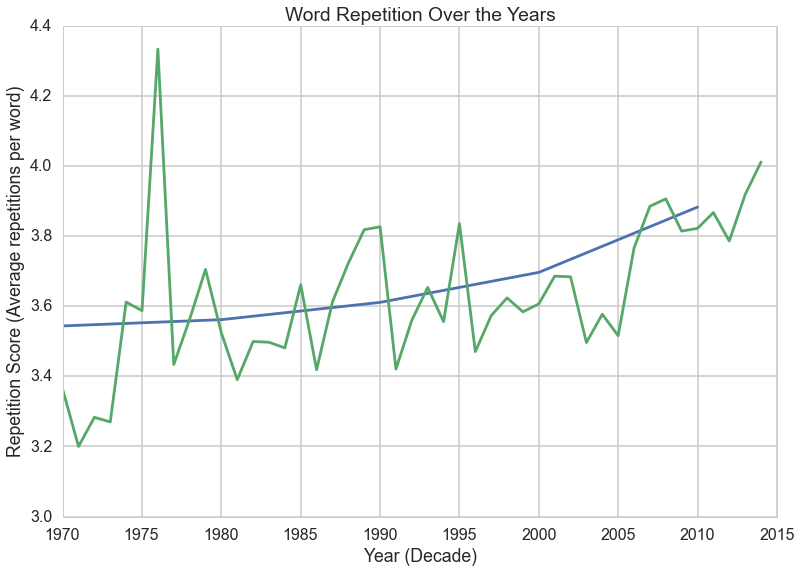

In [13]:
lexplot('repetition_score',"Word Repetition Over the Years","Repetition Score (Average repetitions per word)")

With both word count and words per song increasing over time, it appears that many of the additional words are ones that are reused. Looking at the top ten for repetition:

In [14]:
dfc.sort(columns='repetition_score', inplace=True,ascending=False)
dfc.head(10)

,song_key,lyrics,lyrics_url,lyrics_abstract,decade,artist,title,year,band_singer,ranking,song,songurl,url,born,genres,ya,/wiki/2_Tone,/wiki/A_cappella,/wiki/Acid_house,/wiki/Acid_jazz,/wiki/Acid_rock,/wiki/Acoustic_music,/wiki/Acoustic_rock,/wiki/Adult_Contemporary,/wiki/Adult_Contemporary_Music,/wiki/Adult_contemporary,/wiki/Adult_contemporary_music,/wiki/Adult_contemporary_music#Soft_adult_contemporary,/wiki/Afrobeat,/wiki/Album-oriented_rock,/wiki/Alternative_R%26B,/wiki/Alternative_country,/wiki/Alternative_dance,/wiki/Alternative_dance#Indietronica,/wiki/Alternative_hip_hop,/wiki/Alternative_metal,/wiki/Alternative_pop,/wiki/Alternative_rock,/wiki/Ambient_house,/wiki/Ambient_music,/wiki/American_folk_music,/wiki/Americana_(music),/wiki/Anarcho-punk,/wiki/Anti-folk,/wiki/Arena_rock,/wiki/Art_pop,/wiki/Art_punk,/wiki/Art_rock,/wiki/Avant-garde_music,/wiki/Baggy,...,/wiki/Southern_hip_hop,/wiki/Southern_rap,/wiki/Southern_rock,/wiki/Southern_soul,/wiki/Space_disco,/wiki/Space_rock,/wiki/Spoken_word,/wiki/Sunshine_pop,/wiki/Surf_music,/wiki/Surf_rock,/wiki/Swamp_pop,/wiki/Swamp_rock,/wiki/Swing_(genre),/wiki/Swing_music,/wiki/Symphonic_rock,/wiki/Synthpop,/wiki/Talking_blues,/wiki/Tech_house,/wiki/Techno,/wiki/Techno_music,/wiki/Teen_pop,/wiki/Tejano_music,/wiki/Thrash_metal,/wiki/Traditional_pop,/wiki/Traditional_pop_music,/wiki/Trance_music,/wiki/Trap_music,/wiki/Trip_hop,/wiki/UK_funky,/wiki/UK_garage,/wiki/Underground_hip_hop,/wiki/Urban_adult_contemporary,/wiki/Urban_contemporary,/wiki/Urban_contemporary_gospel,/wiki/Urban_music,/wiki/Vocal_music,/wiki/West_Coast_Rap,/wiki/West_Coast_hip_hop,/wiki/West_coast_hip_hop,/wiki/Western_music_(North_America),/wiki/Western_swing,/wiki/Witch_house,/wiki/World_music,/wiki/Worldbeat,/wiki/Worship_music,/wiki/Zydeco,wordcount,wordset,lexdiv,repetition_score
2741,1997-70,We'll be singing. When we're winning. We'll be...,http://lyrics.wikia.com/Chumbawamba:Tubthumping,We'll be singing. When we're winning. We'll be...,1990,Chumbawamba,Tubthumping,1997,R. Kelly,70,Gotham City,/wiki/Gotham_City_(song),/wiki/R._Kelly,1967-01-08,"[/wiki/Contemporary_R%26B, /wiki/Soul_music, /...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1443,56,0.038808,25.767857
2812,1998-35,We'll be singing. When we're winning. We'll be...,http://lyrics.wikia.com/Chumbawamba:Tubthumping,We'll be singing. When we're winning. We'll be...,1990,Chumbawamba,Tubthumping,1998,Chumbawamba,35,Tubthumping,/wiki/Tubthumping,/wiki/Chumbawamba,False,"[/wiki/Anarcho-punk, /wiki/Pop_music, /wiki/Fo...",1980–2012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1443,56,0.038808,25.767857
634,1976-93,". You've got a real type of thing going down, ...",http://lyrics.wikia.com/Parliament:Give_Up_The...,". You've got a real type of thing going down, ...",1970,Parliament,Give Up the Funk (Tear the Roof off the Sucker),1976,Parliament,93,Give Up the Funk (Tear the Roof off the Sucker),/wiki/Give_Up_the_Funk_(Tear_the_Roof_off_the_...,/wiki/Parliament_(band),False,"[/wiki/Funk, /wiki/Psychedelic_soul, /wiki/Fun...","1968–1970, 1974-1980",False,False,False,False,False,False,Fals

The songs having the least repetition:

In [15]:
dfc.sort(columns='repetition_score', inplace=True,ascending=True)
dfc[['song_key','lyrics','artist','title','wordcount','repetition_score']].head(10)

,song_key,lyrics,artist,title,wordcount,repetition_score
627,1976-86,Are you ready\nDo what you wanna do\nDo what y...,Ohio Players,Who'd She Coo?,35,1.346154
1375,1984-59,I thought that dreams belonged to other men 'C...,Mike Reno,Almost Paradise,144,1.384615
1376,1984-59,I thought that dreams belonged to other men 'C...,Mike Reno,Almost Paradise,144,1.384615
990,1980-61,Oh I could hide 'neath the wings of the blue b...,Anne Murray,Daydream Believer,114,1.443038
153,1971-80,Amazing grace! How sweet the sound. That saved...,Judy Collins,Amazing Grace,128,1.488372
645,1977-4,"Love, soft as an easy chair. Love, fresh as th...",Barbra Streisand,Evergreen (Love Theme from A Star Is Born),128,1.560976
1299,1983-87,I can't keep up with what's been going down. I...,Jackson Browne,Lawyers in Love,168,1.570093
757,1978-21,There's no place for me to hide. The thoughts ...,Chuck Mangione,Feels So Good,118,1.594595
118,1971-36,Take the ribbon from my hair. Shake it loose a...,Sammi Smith,Help Me Make It Through the Night,128,1.620253
1726,1987-100,It never really matter too much to me. That yo...,Ready for the World,Love You Down,81,1.653061


## Lexical Diversity By Genre

There are 435 distinct genres represented in the top 100 for the years 1970-2014, according to the Billboard classification system. Nobody wants to examine 435 panels to spot patterns; accordingly the inquiry will be limited to the genres containing 300 or more members. As a result the number to be considered is only.

In [16]:
dfc.to_csv('all_years_and genres_with_lyrics_and_wordcount_and_vocabulary.csv',encoding='utf-8')
